In [1]:
import riot_api_v1 as riot
#riot.initcash(fromfile=True)

In [2]:
import os, glob, json
DIR_MATCHES = 'loadedmatches'
#DIR_MATCHES = 'matches'
def load_cashed_matches():
	#import glob
	if os.name=='nt':
		cashedids = [item.split('\\')[1].split('.')[0] for item in glob.glob(DIR_MATCHES+'\*.txt')]
	else:
		cashedids = [item.split('/')[1].split('.')[0] for item in glob.glob(DIR_MATCHES+'/*.txt')]
	print('cashed matches ids:')
	for id in cashedids:
		#print('match:',id)
		file = open(DIR_MATCHES+'/'+id+'.txt', 'r')
		match = json.load(file)
		file.close()
		#printmatch(match)
		update_cashed_matches(match)


#in getmatch and load_cashed_matches
def update_cashed_matches(match):
	#global cashedmatches
	#['matchid','queue','win','p1-10','c1-10','creation','duration']
	matchstat = [match['gameId'], match['queueId']]
	teams = match['teams']
	if teams[0]['win']=='Win':
		matchstat.append(100)
	else:
		matchstat.append(200)
	for player in match['participantIdentities']:
		matchstat.append(player['player']['currentAccountId'])
	for player in match['participants']:
		matchstat.append(player['championId'])
	matchstat.append(match['gameCreation'])
	matchstat.append(match['gameDuration'])
	for player in match['participants']:
		matchstat.append(player['highestAchievedSeasonTier'])
	for player in match['participants']:
		for k,v in player['stats'].items():
			matchstat.append(v)
	riot.cashedmatches.append(matchstat)
	return matchstat

In [3]:
riot.cashedmatches = []
load_cashed_matches()

cashed matches ids:


In [4]:
print(len(riot.cashedmatches[0]))
riot.cashedmatches[0][35:136] #len stat = 101

1045


[1,
 True,
 4201,
 3146,
 3020,
 0,
 0,
 0,
 3340,
 7,
 2,
 8,
 4,
 2,
 2,
 263,
 3,
 0,
 0,
 0,
 0,
 32386,
 26956,
 5429,
 0,
 0,
 7086,
 6818,
 268,
 0,
 2233,
 1,
 3397,
 499,
 499,
 1,
 0,
 8269,
 1034,
 7134,
 100,
 7884,
 5000,
 0,
 0,
 46,
 0,
 0,
 0,
 3,
 12,
 0,
 0,
 2,
 0,
 False,
 False,
 False,
 False,
 False,
 True,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8112,
 197,
 0,
 0,
 8139,
 317,
 0,
 0,
 8138,
 30,
 0,
 0,
 8135,
 5,
 0,
 0,
 9111,
 643,
 300,
 0,
 8014,
 179,
 0,
 0,
 8100,
 8000]

In [5]:
players={}
#print(riot.cashedmatches[0][13:23])

def load_players_cashedmatches():
	allplayers = set()
	for item in riot.cashedmatches:
		matchplayers = set(item[3:3+10])
		#print(len(matchplayers), matchplayers)
		allplayers = allplayers.union(matchplayers)
	return allplayers
players = load_players_cashedmatches()

In [189]:
print('all players in cashedmatches:',len(players))
file = open('players-set.txt', 'w', encoding='utf8')
json.dump(list(players), file)
file.close()

all players in cashedmatches: 72956


In [6]:
#save cashedmatches
print('all cashedmatches:',len(riot.cashedmatches))
file = open('cashedmatches-set.txt', 'w', encoding='utf8')
json.dump(riot.cashedmatches, file)
file.close()

all cashedmatches: 38526


In [1]:
import json
#START
#load players and cashedmatches
file = open('cashedmatches-set.txt', 'r')
cashedmatches=json.load(file)
file.close()
print('all cashed matches',len(cashedmatches))
file = open('players-set.txt', 'r')
players=set(json.load(file))
file.close()
print('all players in cashedmatches:',len(players))

all cashed matches 38526
all players in cashedmatches: 72956


In [2]:
import numpy as np
import pandas as pd
m = pd.DataFrame(cashedmatches)
print(m.head(5))
x = m.iloc[:,13:23].copy()
champions = np.unique(x[:])
print(champions)
print(type(champions))

        0     1     2          3          4          5          6     \
0  182639758  1200   100  202225665  201233302  204410278  202939943   
1  182639784  1200   100  202238230  202550313  200163292  204157139   
2  182639803  1200   200  203112515  200074243  204606531  201875934   
3  182639834  1200   200  203601120  203952894  200199360  203581658   
4  182639838  1200   200  200122165  202520920  200202803  203238502   

        7          8          9      ...      1035   1036  1037  1038    1039  \
0  204883600  202054882  202965995   ...    8014.0   85.0   0.0   0.0  9111.0   
1  201933637  203722551  204950394   ...    9111.0   37.0  40.0   0.0  9104.0   
2  203856654  200125290  202720776   ...    8347.0    0.0   0.0   0.0  8304.0   
3  202264295  201883748  200632227   ...    8138.0   30.0   0.0   0.0  8105.0   
4  200313860  202958406  202244080   ...    8143.0  581.0   0.0   0.0  8105.0   

    1040  1041  1042    1043    1044  
0  255.0  80.0   0.0  8100.0  8000.0  
1 

In [3]:
str(cashedmatches[0][0:35])

"[182639758, 1200, 100, 202225665, 201233302, 204410278, 202939943, 204883600, 202054882, 202965995, 203096459, 203237746, 203453904, 55, 112, 99, 62, 131, 131, 117, 254, 110, 102, 1534364853947, 532, 'GOLD', 'GOLD', 'UNRANKED', 'UNRANKED', 'UNRANKED', 'UNRANKED', 'SILVER', 'SILVER', 'SILVER', 'SILVER']"

In [4]:
cdict = {i:[0,0,0] for i in list(champions)} #win, fail, winrate
#print(cdict)
#2 - win 100 blue or 200 red 
#3-12 players
#13-22 champions
#25-35 rank
print(type(players))
players_stat={id:{i:[0,0,0] for i in list(champions)} for id in list(players)}
#print(len(players_stat),players_stat[202054882])
#for match in riot.cashedmatches:
for match in cashedmatches:
    #print(match[3:23])
    win = match[2]
    for i in range(3,13):
        playerid = match[i]
        champion = match[i+10]
        if win==100:#blue win
            if i<=7:
                index=0 #win
            else:
                index=1 #fail
        else:
            if i<=7:
                index=1 #fail
            else:
                index=0 #win
        last = players_stat[playerid][champion]
        #print()
        #print(i, playerid, win, index, champion, last)
        players_stat[playerid][champion][index] = last[index] + 1
        #print(i, playerid, win, index, champion, players_stat[playerid][champion])
        #print(players_stat[player])
#print(players_stat[player])

#players_stat:
print(len(players_stat),players_stat[202054882])

<class 'set'>
72956 {1: [0, 0, 0], 2: [0, 0, 0], 3: [0, 0, 0], 4: [0, 0, 0], 5: [0, 0, 0], 6: [0, 0, 0], 7: [0, 0, 0], 8: [0, 0, 0], 9: [0, 0, 0], 10: [0, 0, 0], 11: [0, 0, 0], 12: [0, 0, 0], 13: [0, 0, 0], 14: [0, 0, 0], 15: [0, 0, 0], 16: [0, 0, 0], 17: [0, 0, 0], 18: [0, 0, 0], 19: [0, 0, 0], 20: [0, 0, 0], 21: [0, 0, 0], 22: [0, 0, 0], 23: [0, 0, 0], 24: [1, 1, 0], 25: [0, 0, 0], 26: [0, 0, 0], 27: [0, 0, 0], 28: [0, 0, 0], 29: [0, 0, 0], 30: [0, 0, 0], 31: [0, 0, 0], 32: [0, 0, 0], 33: [0, 0, 0], 34: [0, 0, 0], 35: [0, 0, 0], 36: [0, 0, 0], 37: [0, 1, 0], 38: [0, 0, 0], 39: [0, 0, 0], 40: [0, 0, 0], 41: [0, 0, 0], 42: [0, 0, 0], 43: [0, 0, 0], 44: [0, 0, 0], 45: [0, 0, 0], 48: [0, 0, 0], 50: [0, 0, 0], 51: [0, 0, 0], 53: [0, 0, 0], 54: [0, 0, 0], 55: [0, 0, 0], 56: [0, 0, 0], 57: [0, 0, 0], 58: [0, 0, 0], 59: [0, 0, 0], 60: [0, 0, 0], 61: [0, 0, 0], 62: [0, 0, 0], 63: [0, 0, 0], 64: [0, 0, 0], 67: [0, 0, 0], 68: [0, 0, 0], 69: [0, 0, 0], 72: [0, 0, 0], 74: [0, 0, 0], 75: [0, 0, 0]

In [5]:
#print(players_stat[202225665])
#print(players_stat[200278136])
players_winrate={}
for player,c in players_stat.items():
    winrate=[0,0,0]
    #print(player,champions)
    for index in c.values():
        if (index[0]+index[1]) > 0:
            index[2] = index[0]/(index[0]+index[1])
        winrate[0]+=index[0]
        winrate[1]+=index[1]
    winrate[2]=winrate[0]/(winrate[0]+winrate[1])
    players_winrate[player]=winrate

'''
for match in riot.cashedmatches[0:1]:
    win = match[2]
    for i in range(13,22):
        champion = match[i]
        #print(champion)
''' 
print(len(players_winrate))

72956


In [6]:
#only winrate (30 features = 10 players *3)
#MSE: 0.0703
#Accuracy score (training): 0.953
#Accuracy score (validation): 0.930
newmatches = []
#for match in riot.cashedmatches:
for match in cashedmatches:
    a=[match[2]/100-1]
    for i in range(3,13): #get players
        a.extend(players_winrate[match[i]])
    newmatches.append(a)
print(len(newmatches))
print(newmatches[0])

38526
[0.0, 1, 0, 1.0, 1, 0, 1.0, 2, 1, 0.6666666666666666, 9, 4, 0.6923076923076923, 2, 0, 1.0, 3, 6, 0.3333333333333333, 0, 1, 0.0, 0, 1, 0.0, 17, 14, 0.5483870967741935, 5, 6, 0.45454545454545453]


In [514]:
#win champions winrate (141*10)
newmatches = []
for match in riot.cashedmatches:
    a=[match[2]/100-1]
    for i in range(3,13): #get players
        a.extend(players_winrate[match[i]])
        p = players_stat[match[i]]
        for j in p:
            #print(p[j][2])
            a.append(p[j][2])
    newmatches.append(a)
print(len(newmatches[0]))
#print(newmatches)

1441


In [ ]:
#get more data: gold, points, k/d/a
#"kills": 10, "deaths": 5, "assists": 7
#"goldEarned": 11074
#!!! NOT READY TO USE
newmatches = []
for match in riot.cashedmatches:
    a=[match[2]/100-1]
    for i in range(3,13): #get players
        a.extend(players_winrate[match[i]])
        p = players_stat[match[i]]
        for j in p:
            #print(p[j][2])
            a.append(p[j][2])
    newmatches.append(a)
print(len(newmatches))
print(newmatches[0])

In [7]:
print(newmatches[0])

[0.0, 1, 0, 1.0, 1, 0, 1.0, 2, 1, 0.6666666666666666, 9, 4, 0.6923076923076923, 2, 0, 1.0, 3, 6, 0.3333333333333333, 0, 1, 0.0, 0, 1, 0.0, 17, 14, 0.5483870967741935, 5, 6, 0.45454545454545453]


In [8]:
matches = pd.DataFrame(newmatches)
x = matches.iloc[:,1:]
y = matches[[0]]
y1d = y.values.ravel()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
print(scaler.mean_)
print(scaler.scale_)
#x_scaled = scaler.transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y1d, test_size=0.3) #x_scaled
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#transform:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[ 6.55640347  6.1482116   0.49266104  6.45852152  6.06053055  0.49000458
  6.48403675  6.03408088  0.49300013  6.44193532  6.03631314  0.49031946
  6.64777034  6.2223174   0.49342437  6.84394954  6.09821938  0.50775632
  6.76031771  5.98468567  0.50925004  6.76774127  5.98151897  0.50846159
  6.72436796  5.98549032  0.50721789  6.81098479  6.08695426  0.50790457]
[ 6.39750115  5.68838966  0.23058213  6.35185262  5.58778593  0.23154798
  6.33814101  5.5926367   0.22934259  6.21764242  5.47521635  0.22981853
  6.41686427  5.72452193  0.22703519  6.51959821  5.61859518  0.22695408
  6.44432905  5.51060708  0.22901889  6.40829824  5.51201969  0.22955435
  6.41994954  5.58405933  0.23085359  6.48141672  5.60435377  0.22715568]
(26968, 30) (26968,)
(11558, 30) (11558,)


In [9]:
print(players_winrate[200220472])
#print(players_stat[200220472])
#print(players_stat[202225665])
print(X_train[0])

[6, 12, 0.3333333333333333]
[-1.02483819 -0.72924182 -2.13659676 -1.01679335 -0.72667969 -2.11621188
 -0.86524373 -0.00609388 -1.52672467 -1.03607362  0.35865009 -2.1335071
 -0.8801449  -0.91227136  0.02896305 -0.74298283 -0.55142243 -0.47479351
 -0.42833283 -1.08603019  2.14283619 -0.58794724 -1.08517736  2.14127247
 -0.89165311 -0.89280755 -0.0312661   0.02916264 -0.19394819  0.33205756]


In [6]:
import numpy as np
import pandas as pd
matches = pd.DataFrame(riot.cashedmatches)
matches.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044
0,182639758,1200,100,202225665,201233302,204410278,202939943,204883600,202054882,202965995,...,8014.0,85.0,0.0,0.0,9111.0,255.0,80.0,0.0,8100.0,8000.0
1,182639784,1200,100,202238230,202550313,200163292,204157139,201933637,203722551,204950394,...,9111.0,37.0,40.0,0.0,9104.0,0.0,0.0,0.0,8100.0,8000.0
2,182639803,1200,200,203112515,200074243,204606531,201875934,203856654,200125290,202720776,...,8347.0,0.0,0.0,0.0,8304.0,4.0,3.0,0.0,8200.0,8300.0
3,182639834,1200,200,203601120,203952894,200199360,203581658,202264295,201883748,200632227,...,8138.0,30.0,0.0,0.0,8105.0,4.0,0.0,0.0,8200.0,8100.0
4,182639838,1200,200,200122165,202520920,200202803,203238502,200313860,202958406,202244080,...,8143.0,581.0,0.0,0.0,8105.0,5.0,0.0,0.0,8000.0,8100.0


In [7]:
print(riot.cashedmatches[0][25:35])

['GOLD', 'GOLD', 'UNRANKED', 'UNRANKED', 'UNRANKED', 'UNRANKED', 'SILVER', 'SILVER', 'SILVER', 'SILVER']


In [42]:
y = matches[[2]]/100-1
#y = (matches[[2]]-150)/50
y.head()

,2
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [ ]:
x = matches.iloc[:,13:35].drop(labels=[23,24], axis=1).copy()
ranks = {'UNRANKED':0, 'BRONZE':1, 'SILVER':2, 'GOLD':3, 'PLATINUM':4, 'DIAMOND':5, 'MASTER':6, 'CHALLENGER':7}
print(ranks)
for i in range(25,35):
    x[i].replace(ranks, inplace=True)
x.head()

In [27]:
from sklearn.preprocessing import LabelEncoder
x2 = x.copy()

for column_name in range(25,35):
    label_encoder = LabelEncoder() 

    # Get the column values
    x_values = list(x[column_name].values)

    # Fit the label encoder
    label_encoder.fit(x_values)

    # Transform the feature
    x2[column_name] = label_encoder.transform(x_values)

In [114]:
x2=x.copy()
x2.head()

,13,14,15,16,17,18,19,20,21,22,25,26,27,28,29,30,31,32,33,34
0,55,112,99,62,131,131,117,254,110,102,3,3,0,0,0,0,2,2,2,2
1,107,21,63,498,61,202,11,222,90,24,2,0,0,0,2,0,0,0,2,2
2,145,30,5,21,11,101,80,110,30,20,2,3,0,0,0,1,1,2,3,5
3,53,14,145,202,84,99,5,141,62,25,0,1,0,0,0,3,2,0,1,0
4,107,77,145,55,222,145,64,63,134,203,3,4,4,2,2,0,3,2,2,2


In [115]:
y1d = y.values.ravel()
y1d

array([ 0.,  0.,  1., ...,  1.,  1.,  1.])

In [118]:
x3=x2.values

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x2)
x3 = scaler.transform(x2)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x3, y1d, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(19263, 20) (19263,)
(19263, 20) (19263,)


In [461]:
X_test

array([[-0.55590509, -0.72924182,  0.46551293, ..., -0.16618102,
        -0.11593754, -0.24177634],
       [ 0.22565006, -0.72924182,  1.33288282, ..., -0.16618102,
        -0.11593754, -0.24177634],
       [-0.55590509, -1.08083517,  2.20025272, ..., -0.16618102,
        -0.11593754, -0.24177634],
       ..., 
       [-0.55590509, -0.20185178, -0.5102782 , ..., -0.16618102,
        -0.11593754, -0.24177634],
       [-0.39959406, -0.37764846,  0.03182798, ..., -0.16618102,
        -0.11593754, -0.24177634],
       [ 1.31982728,  1.38031831,  0.10660125, ..., -0.16618102,
        -0.11593754,  4.8135587 ]])

In [174]:
X_test_old = X_test.copy
#mean = X_test[:,-10:].mean()
mean = X_test[:,0:10].mean()
print(mean)
for i in X_test:
    i[0:10]=mean        
X_test[0]

0.000275268480486


array([  2.75268480e-04,   2.75268480e-04,   2.75268480e-04,
         2.75268480e-04,   2.75268480e-04,   2.75268480e-04,
         2.75268480e-04,   2.75268480e-04,   2.75268480e-04,
         2.75268480e-04,  -1.02853357e+00,  -3.59042278e-01,
         1.65683702e+00,   9.99537541e-01,  -1.02209198e+00,
         9.96347185e-01,   2.80702825e-01,  -3.91725221e-01,
         2.74442803e-01,  -3.62204745e-01])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
#from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# #############################################################################
# Fit regression model
#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01}
params =  {'n_estimators': 300, 'learning_rate':0.5, 'max_features':2, 'max_depth': 2}#, 'random_state': 0}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)
print("Accuracy score (training): {0:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(clf.score(X_test, y_test)))
print()
    
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

y_scores_clf = clf.decision_function(X_test)
fpr_clf, tpr_clf, _ = roc_curve(y_test, y_scores_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)

print("Area under ROC curve = {:0.2f}".format(roc_auc_clf))

MSE: 0.0657
Accuracy score (training): 0.951
Accuracy score (validation): 0.934

Confusion Matrix:
[[5212  380]
 [ 379 5587]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93      5592
        1.0       0.94      0.94      0.94      5966

avg / total       0.93      0.93      0.93     11558

Area under ROC curve = 0.99


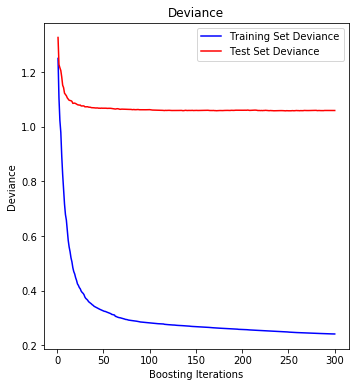

In [11]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

[10  7  4 24  0 13  1 12 21  9  3 18 29 25 16 19 22 15 28  8 23 11 17 27 26
  2  5 20 14  6]


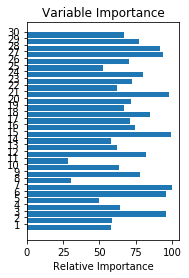

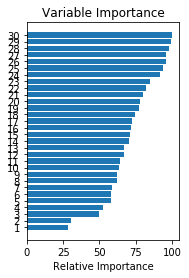

In [12]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(sorted_idx, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.iloc[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.iloc[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [16]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier()

eclf = VotingClassifier(estimators=[('dtc', clf1), ('rf', clf2), ('gnb', clf3), ('bgc', clf4)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['DecisionTree', 'RandomForest', 'naiveBayes', 'GradientBoostingClassifier','Ensemble']):
    #scores = cross_val_score(clf, x_scaled, y1d, cv=5, scoring='accuracy') #before: x2
    scores = cross_val_score(clf, x, y1d, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.81 (+/- 0.01) [DecisionTree]
Accuracy: 0.94 (+/- 0.01) [RandomForest]
Accuracy: 0.92 (+/- 0.01) [naiveBayes]
Accuracy: 0.93 (+/- 0.01) [GradientBoostingClassifier]
Accuracy: 0.93 (+/- 0.01) [Ensemble]


In [ ]:
learning_rates = [i*0.01 for i in range(10,100,5)]
for learning_rate in learning_rates:
    #gb = GradientBoostingClassifier(n_estimators=242, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb = GradientBoostingClassifier(n_estimators=200, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

In [13]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(tf.__git_version__,tf.__compiler_version__,tf.__cxx11_abi_flag__,tf.__monolithic_build__)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

1.9.0
b'unknown' MSVC 190024215 0 1


In [61]:
l2_bigger_model = keras.models.Sequential([
    keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01),
activation=tf.nn.relu, input_shape=(30,)),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01),
activation=tf.nn.relu),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
l2_bigger_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])
l2_bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
_________________________________________________________________


In [62]:
l2_bigger_history = l2_bigger_model.fit(X_train, y_train,
                                epochs=20,
                                batch_size=1024,
                                validation_data=(X_test, y_test),
                                verbose=1)

Train on 26968 samples, validate on 11558 samples
Epoch 1/20
26968/26968 [==============================] - 1s 20us/step - loss: 1.9215 - acc: 0.8610 - binary_crossentropy: 0.4152 - val_loss: 1.4791 - val_acc: 0.9218 - val_binary_crossentropy: 0.2399
Epoch 2/20
26968/26968 [==============================] - 0s 5us/step - loss: 1.2262 - acc: 0.9253 - binary_crossentropy: 0.2051 - val_loss: 0.9878 - val_acc: 0.9268 - val_binary_crossentropy: 0.1927
Epoch 3/20
26968/26968 [==============================] - 0s 5us/step - loss: 0.8289 - acc: 0.9287 - binary_crossentropy: 0.1878 - val_loss: 0.6804 - val_acc: 0.9290 - val_binary_crossentropy: 0.1865
Epoch 4/20
26968/26968 [==============================] - 0s 6us/step - loss: 0.5813 - acc: 0.9299 - binary_crossentropy: 0.1812 - val_loss: 0.4912 - val_acc: 0.9283 - val_binary_crossentropy: 0.1807
Epoch 5/20
26968/26968 [==============================] - 0s 5us/step - loss: 0.4294 - acc: 0.9310 - binary_crossentropy: 0.1764 - val_loss: 0.3765 -

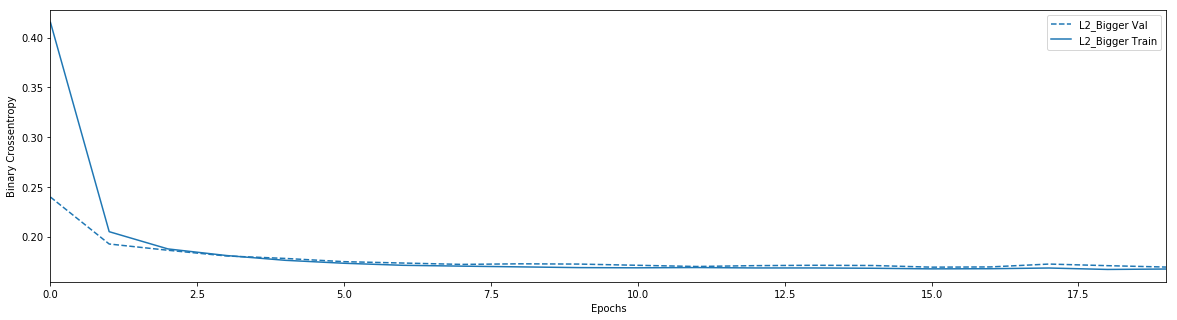

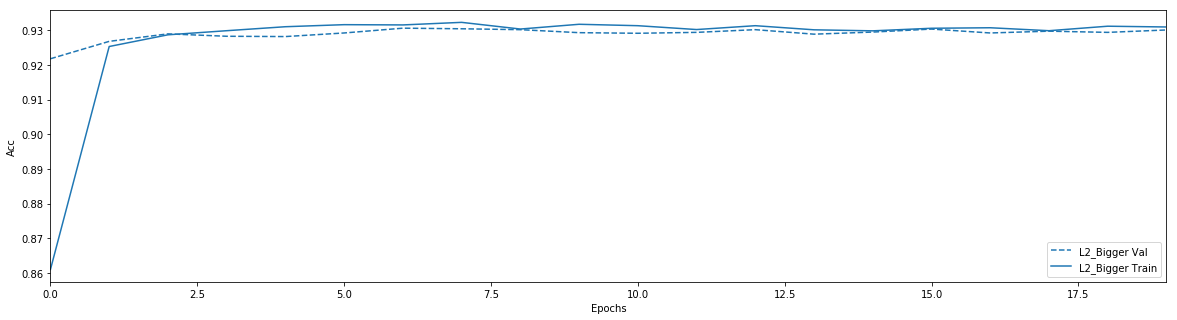

In [63]:
def plot_history(histories, key='binary_crossentropy'): # , acc
  plt.figure(figsize=(20,5))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_history([('l2_bigger', l2_bigger_history)], key='binary_crossentropy')
plot_history([('l2_bigger', l2_bigger_history)], key='acc')
'''
plot_history([('baseline', baseline_history),('l2', l2_model_history),('l2_bigger', l2_bigger_history),
              ('dpt_bigger', dpt_bigger_history)])

plot_history([('baseline', baseline_history),('l2', l2_model_history),('l2_bigger', l2_bigger_history),
              ('dpt_bigger', dpt_bigger_history)], key='acc')
'''
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
predictions = l2_bigger_model.predict(X_test)
mean_squared_error(y_test, predictions)

0.051034490944456806

In [65]:
predict  = l2_bigger_model.predict(X_test,verbose=1)
print(predict.mean(), predict.std(), predict.var())
train_predict = l2_bigger_model.predict(X_train,verbose=1)
print(train_predict.mean(), train_predict.std(), train_predict.var())

11558/11558 [==============================] - 0s 12us/step
0.507959 0.43948 0.193143
26968/26968 [==============================] - 0s 11us/step
0.501817 0.441431 0.194862


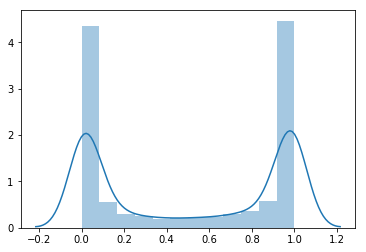

In [75]:
import seaborn as sns
%matplotlib inline
sns.distplot(predict);


In [66]:
balance = 100
bet = 0.5 #%
win = 1.1 #win reward multiplied
predict  = l2_bigger_model.predict(X_test,verbose=1)
print(len(predict), len(y_test))
count = 0
for i in range(len(predict)):
    #print(predict[i], y_test.iloc[i], abs(y_test.iloc[i]-predict[i]))
    if abs(y_test[i]-predict[i])<0.5:
        count+=1
print(count, count/len(y_test))

for i in range(100):
#for i in range(len(predict)):
    if abs(0.5-predict[i])>0.49:
        cash = balance * bet
        balance-=cash
    else:
        continue
    if abs(y_test[i]-predict[i])<0.5:
        reward = win * cash
        balance +=reward
    print(balance)
print(balance)

11558/11558 [==============================] - 0s 12us/step
11558 11558
10750 0.9300917113687489
105.0
110.25
115.7625
121.55062500000001
127.62815625000002
134.00956406250003
140.71004226562502
147.7455443789063
155.1328215978516
162.88946267774418
171.0339358116314
179.58563260221297
188.56491423232364
197.99315994393982
207.8928179411368
218.28745883819363
229.2018317801033
240.66192336910848
252.69501953756392
265.32977051444215
278.5962590401642
292.52607199217243
307.15237559178104
322.5099943713701
338.6354940899387
355.5672687944356
373.3456322341574
392.0129138458653
411.6135595381586
432.19423751506656
453.80394939081987
476.49414686036084
500.3188542033789
525.334796913548
551.6015367592254
579.1816135971867
608.1406942770461
638.5477289908985
670.4751154404435
703.9988712124657
739.198814773089
776.1587555117435
814.9666932873307
855.7150279516973
898.5007793492821
943.4258183167462
990.5971092325836
1040.1269646942128
1092.1333129289235
1146.7399785753696
1204.076977504138